# En clase Sesión 3

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

In [ ]:
#Agregar celdas del archivo ejemplo 1

In [ ]:
df = pd.read_json('/work/B2-Analisis-de-Datos-con-Python-2020-2021-Santander/Datasets/zomato_reviews-clean.json')
df.head()

,has_online_delivery,price_range,currency,name,cuisines,location.address,location.city,user_rating
0,1,3,Rs.,Hauz Khas Social,"Continental, American, Asian, North Indian","9-A & 12, Hauz Khas Village, New Delhi",New Delhi,Very Good
1,0,3,Rs.,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...","C-7, Vishal Enclave, Opposite Metro Pillar 417...",New Delhi,Excellent
2,1,2,Rs.,The Hudson Cafe,"Cafe, Italian, Continental, Chinese","2524, 1st Floor, Hudson Lane, Delhi University...",New Delhi,Very Good
3,0,3,Rs.,Summer House Cafe,"Italian, Continental","1st Floor, DDA Shopping Complex, Aurobindo Pla...",New Delhi,Very Good
4,0,3,Rs.,38 Barracks,"North Indian, Italian, Asian, American","M-38, Outer Circle, Connaught Place, New Delhi",New Delhi,Very Good


In [ ]:
df['user_rating'].astype('category')

0       Very Good
1       Excellent
2       Very Good
3       Very Good
4       Very Good
          ...    
1175    Very Good
1176    Excellent
1177    Excellent
1178         Good
1179         Good
Name: user_rating, Length: 1180, dtype: category
Categories (6, object): ['Average', 'Excellent', 'Good', 'Not rated', 'Poor', 'Very Good']

In [ ]:
counts = df['user_rating'].value_counts()
counts

Very Good    490
Good         346
Excellent    194
Average      119
Not rated     26
Poor           5
Name: user_rating, dtype: int64

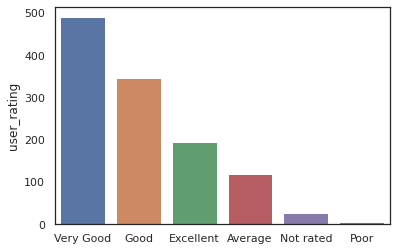

In [ ]:
sns.barplot(x=counts.index, y=counts);

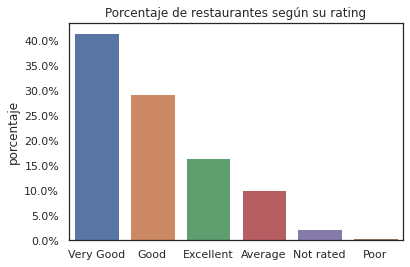

In [ ]:
import matplotlib.ticker #para agregar % en númoeros del eje y

percentage = counts * 100 / counts.sum()
#print(percentage)

ax = sns.barplot(x=percentage.index,y=percentage)
ax.set(title='Porcentaje de restaurantes según su rating',ylabel='porcentaje')
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())

Obteniendo la moda

In [ ]:
df['user_rating'].mode()

0    Very Good
dtype: object

In [ ]:
df['values'] = 1


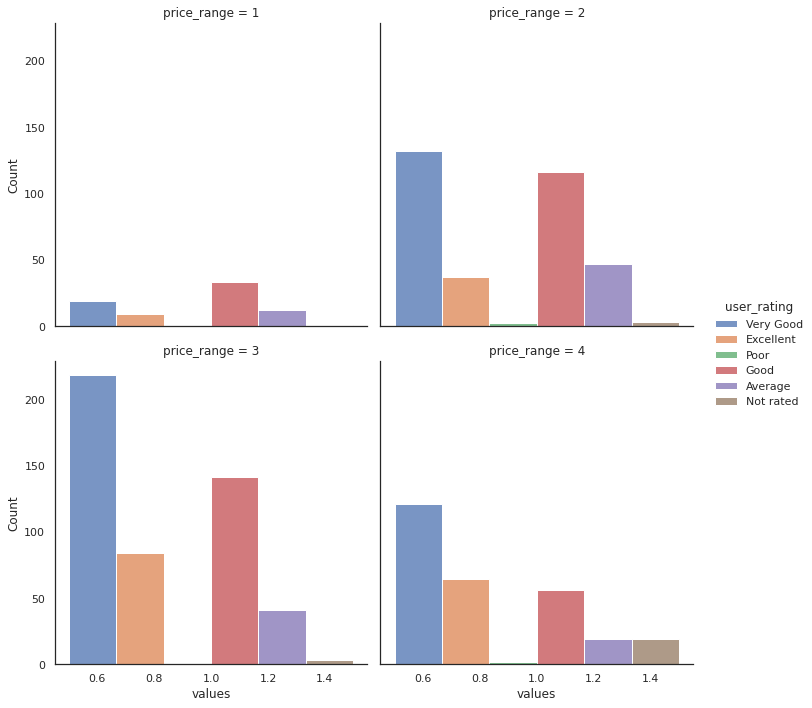

In [ ]:
sns.displot(data=df,x='values',hue='user_rating', multiple='dodge',col='price_range',col_wrap=2)

## tablas de contingencia

In [ ]:
df['user_rating'].unique()

array(['Very Good', 'Excellent', 'Poor', 'Good', 'Average', 'Not rated'],
      dtype=object)

In [ ]:
pd.crosstab(df['price_range'],df['user_rating'])

user_rating,Average,Excellent,Good,Not rated,Poor,Very Good
price_range,,,,,,
1,12,9,33,1,0,19
2,47,37,116,3,2,132
3,41,84,141,3,1,218
4,19,64,56,19,2,121


In [ ]:
pd.crosstab(df['price_range'],df['user_rating'], margins=True,margins_name="total")


user_rating,Average,Excellent,Good,Not rated,Poor,Very Good,total
price_range,,,,,,,
1,12,9,33,1,0,19,74
2,47,37,116,3,2,132,337
3,41,84,141,3,1,218,488
4,19,64,56,19,2,121,281
total,119,194,346,26,5,490,1180


In [ ]:
#Multivariable
c = pd.crosstab(df['price_range'],[df['has_online_delivery'],df['user_rating']], margins=True,margins_name="Total")
pd.crosstab(df['price_range'], [df['has_online_delivery'], df['user_rating']], margins=True, margins_name='total')
c.stack(1)

has_online_delivery          0     1   Total
price_range user_rating                     
1                          NaN   NaN    74.0
            Average       12.0   0.0     NaN
            Excellent      8.0   1.0     NaN
            Good          32.0   1.0     NaN
            Not rated      1.0   NaN     NaN
            Poor           0.0   0.0     NaN
            Very Good     15.0   4.0     NaN
2                          NaN   NaN   337.0
            Average       47.0   0.0     NaN
            Excellent     30.0   7.0     NaN
            Good         104.0  12.0     NaN
            Not rated      3.0   NaN     NaN
            Poor           1.0   1.0     NaN
            Very Good     99.0  33.0     NaN
3                          NaN   NaN   488.0
            Average       40.0   1.0     NaN
            Excellent     70.0  14.0     NaN
            Good         132.0   9.0     NaN
            Not rated      3.0   NaN     NaN
            Poor           1.0   0.0     NaN
            Very Good    183.0  35.0     NaN
4                          NaN   NaN   281.0
            Average       19.0   0.0     NaN
            Excellent     61.0   3.0     NaN
            Good          52.0   4.0     NaN
            Not rated     19.0   NaN     NaN
            Poor           2.0   0.0     NaN
            Very Good    113.0   8.0     NaN
Total                      NaN   NaN  1180.0
            Average      118.0   1.0     NaN
            Excellent    169.0  25.0     NaN
            Good         320.0  26.0     NaN
            Not rated     26.0   NaN     NaN
            Poor           4.0   1.0     NaN
            Very Good    410.0  80.0     NaN

In [ ]:
ca = pd.crosstab(df['price_range'],[df['has_online_delivery'],df['user_rating']])
ca.stack(0)

user_rating                      Average  Excellent  Good  Not rated  Poor  \
price_range has_online_delivery                                              
1           0                         12          8    32        1.0     0   
            1                          0          1     1        NaN     0   
2           0                         47         30   104        3.0     1   
            1                          0          7    12        NaN     1   
3           0                         40         70   132        3.0     1   
            1                          1         14     9        NaN     0   
4           0                         19         61    52       19.0     2   
            1                          0          3     4        NaN     0   

user_rating                      Very Good  
price_range has_online_delivery             
1           0                           15  
            1                            4  
2           0                           99  
            1                           33  
3           0                          183  
            1                           35  
4           0                          113  
            1                            8

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f8149d1c-e6b1-497a-9109-f01641a8231a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>